# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240403

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [2]:
import warnings

import pandas as pd

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

import numpy as np
            #import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt

import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats


In [3]:
sc.logging.print_versions()

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [4]:
adata = sc.read_h5ad("/home/acirnu/data/ACM_cardiac_leuco/scANVI/ACM_lymphoids_clustered_ac240403.raw.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 10104 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'n_genes', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_coun

In [5]:
adata.obs

,cell_source,donor,n_counts,n_genes,sample,seed_labels,condition,genotype,infection,library,...,percent_chrY,XIST-counts,S_score,G2M_score,_scvi_batch,_scvi_labels,batch,C_scANVI,leiden,classification
AAACCCAAGATACAGT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,8265.0,2689,Pkp2_Ctr_noninf_2,CD4,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,0.000000,0.0,-0.339369,-0.496060,7,1,reference,CD4,5,CD4_5
AACCCAATCAGCTGAT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,13594.0,3640,Pkp2_Ctr_noninf_1,CD8,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,0.021233,0.0,0.525671,-0.137838,6,2,reference,CD8,4,CD8_4
AACCTGAAGATAGCAT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,13182.0,3085,Pkp2_Ctr_noninf_1,B,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,0.063510,0.0,-0.268815,-0.516689,6,0,reference,B,10,B_10
AACGTCAAGCTACTGT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,1860.0,1106,Pkp2_Ctr_noninf_2,CD4,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,0.194458,0.0,-0.270605,-0.340320,7,1,reference,CD4,11,CD4_11
AACTTCTCAAGCGCTC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,9586.0,2703,Pkp2_Ctr_noninf_2,CD4,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,...,0.000000,0.0,-0.414867,-0.271517,7,1,reference,CD4,5,CD4_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGTATGACA-1-B2,AG_Gerull,Ttn_HetKO_MCMV_1,12119.0,2704,Ttn_HetKO_MCMV_1,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,...,0.016503,0.0,-0.267751,-0.531946,25,5,query,B,10,B_10
TTTGGAGAGATTAGCA-1-B2,AG_Gerull,Ttn_Ctr_MCMV_2,20506.0,4156,Ttn_Ctr_MCMV_2,Unknown,Ttn_Ctr_MCMV,Ttn_Ctr,MCMV,B2,...,0.000000,23.0,2.905559,0.470866,21,5,query,B,2,B_2
TTTGGTTAGCACCTGC-1-B2,AG_Gerull,Ttn_HetKO_MCMV_2,3174.0,1436,Ttn_HetKO_MCMV_2,Unknown,Ttn_HetKO_MCMV,Ttn_HetKO,MCMV,B2,...,0.000000,0.0,0.000996,-0.736926,26,5,query,CD8,4,CD8_4
TTTGTTGAGACCTCCG-1-B2,AG_Gerull,Ttn_HetKO_noninf_2,4549.0,1710,Ttn_HetKO_noninf_2,Unknown,Ttn_HetKO_noninf,Ttn_HetKO,noninf,B2,...,0.000000,0.0,-0.428444,-0.362500,29,5,query,B,13,B_13


In [6]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO', 'Ttn_Ctr', 'Ttn_HetKO'], dtype='object')

In [7]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [8]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf','Ttn_Ctr_MCMV', 'Ttn_HetKO_MCMV' ]
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV', 'Ttn_Ctr_noninf', 'Ttn_HetKO_noninf', 'Ttn_Ctr_MCMV',
       'Ttn_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [9]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="classification",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 10134 × 29414
  2 modalities
    rna:	10104 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_counts-B2', 'pct_dropout_by_counts-B2', 'total_counts-B2'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

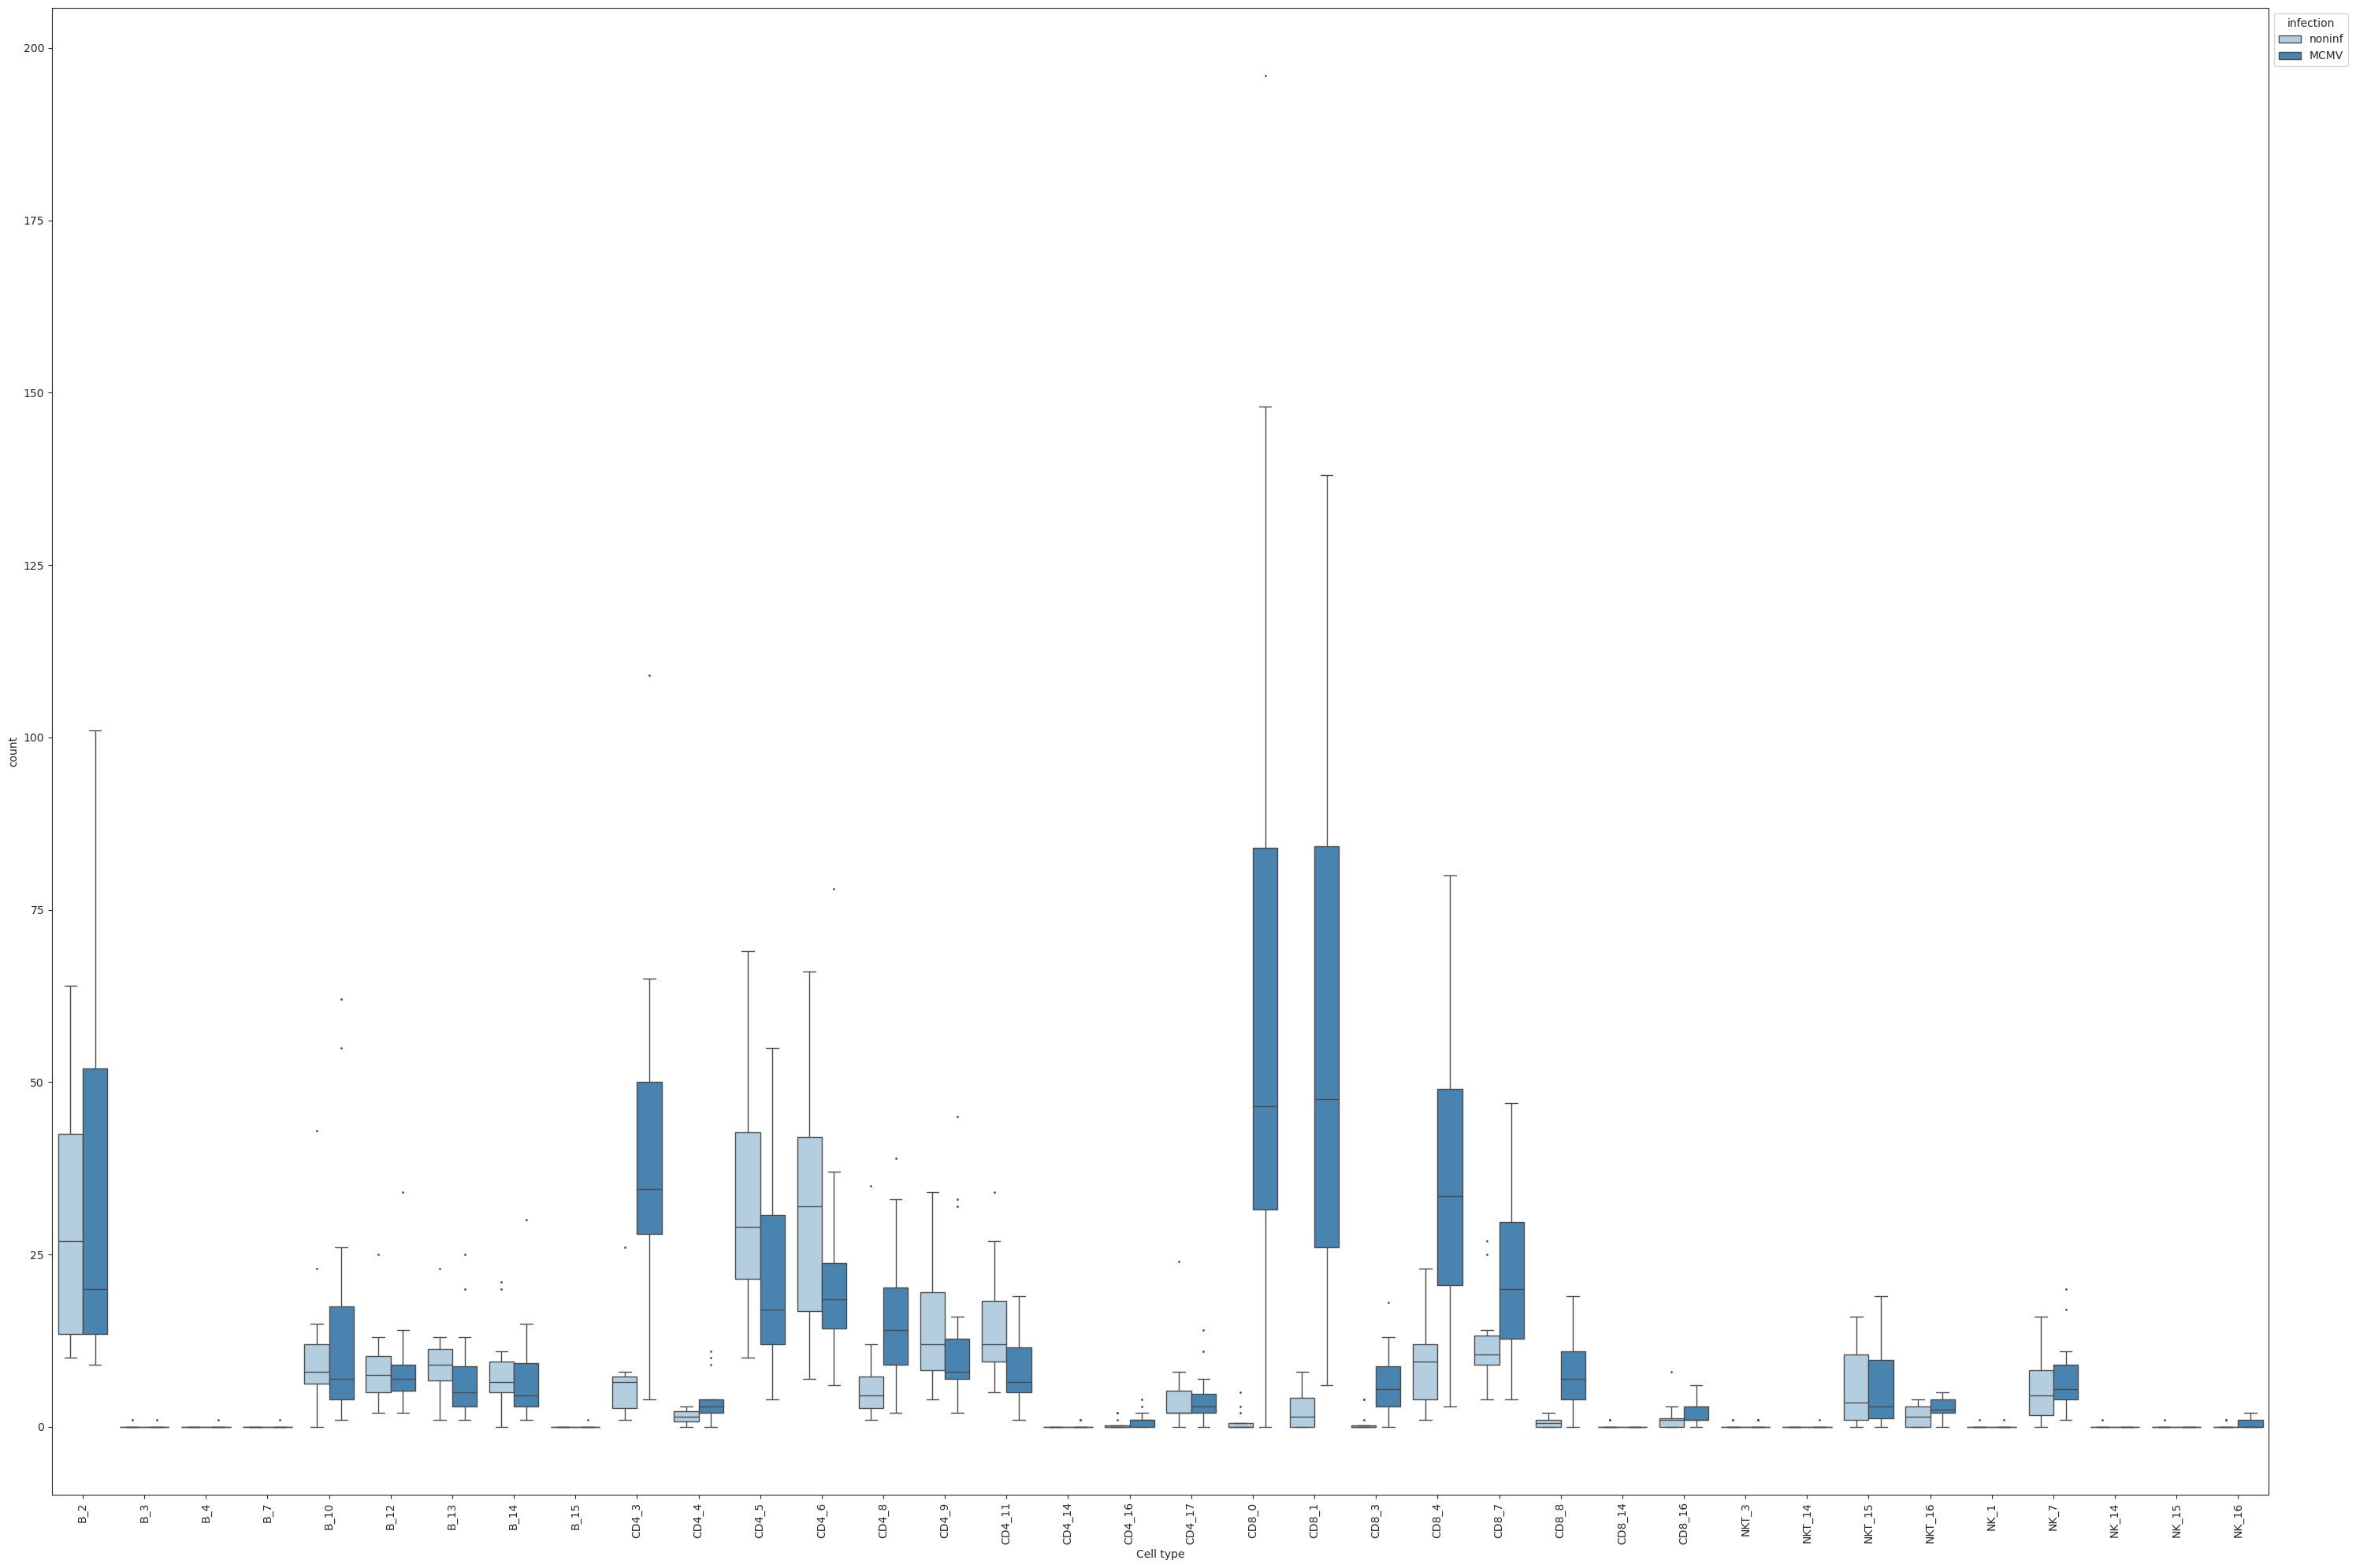

In [10]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.show()

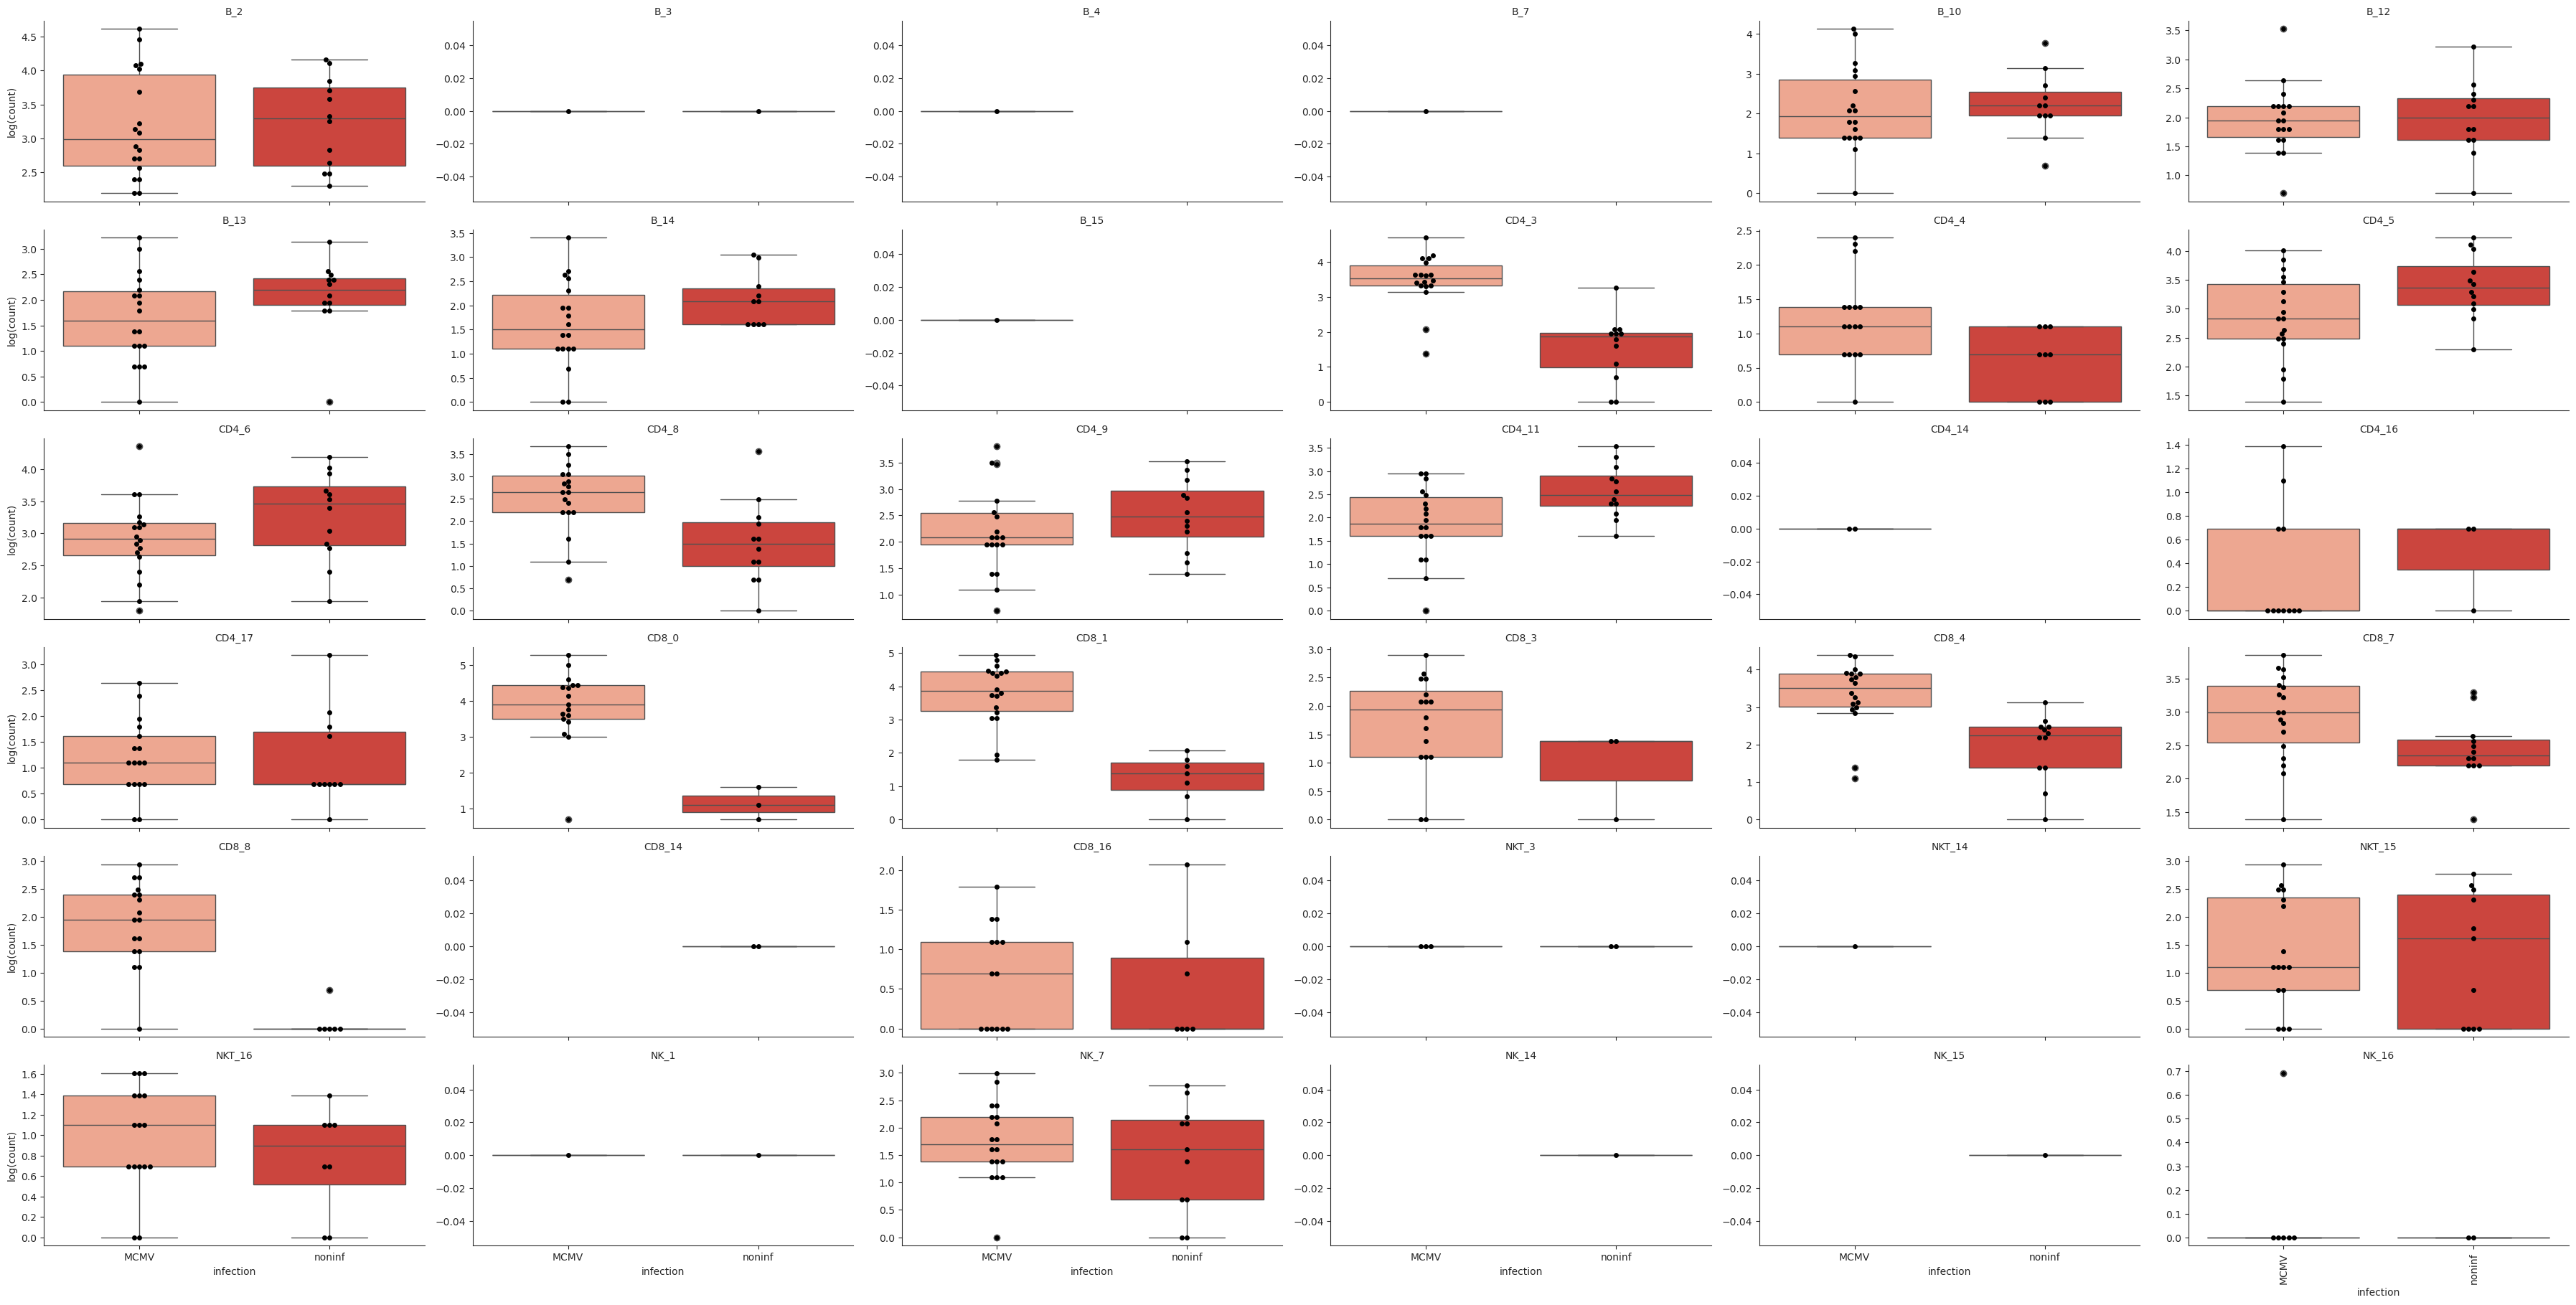

In [11]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.show()

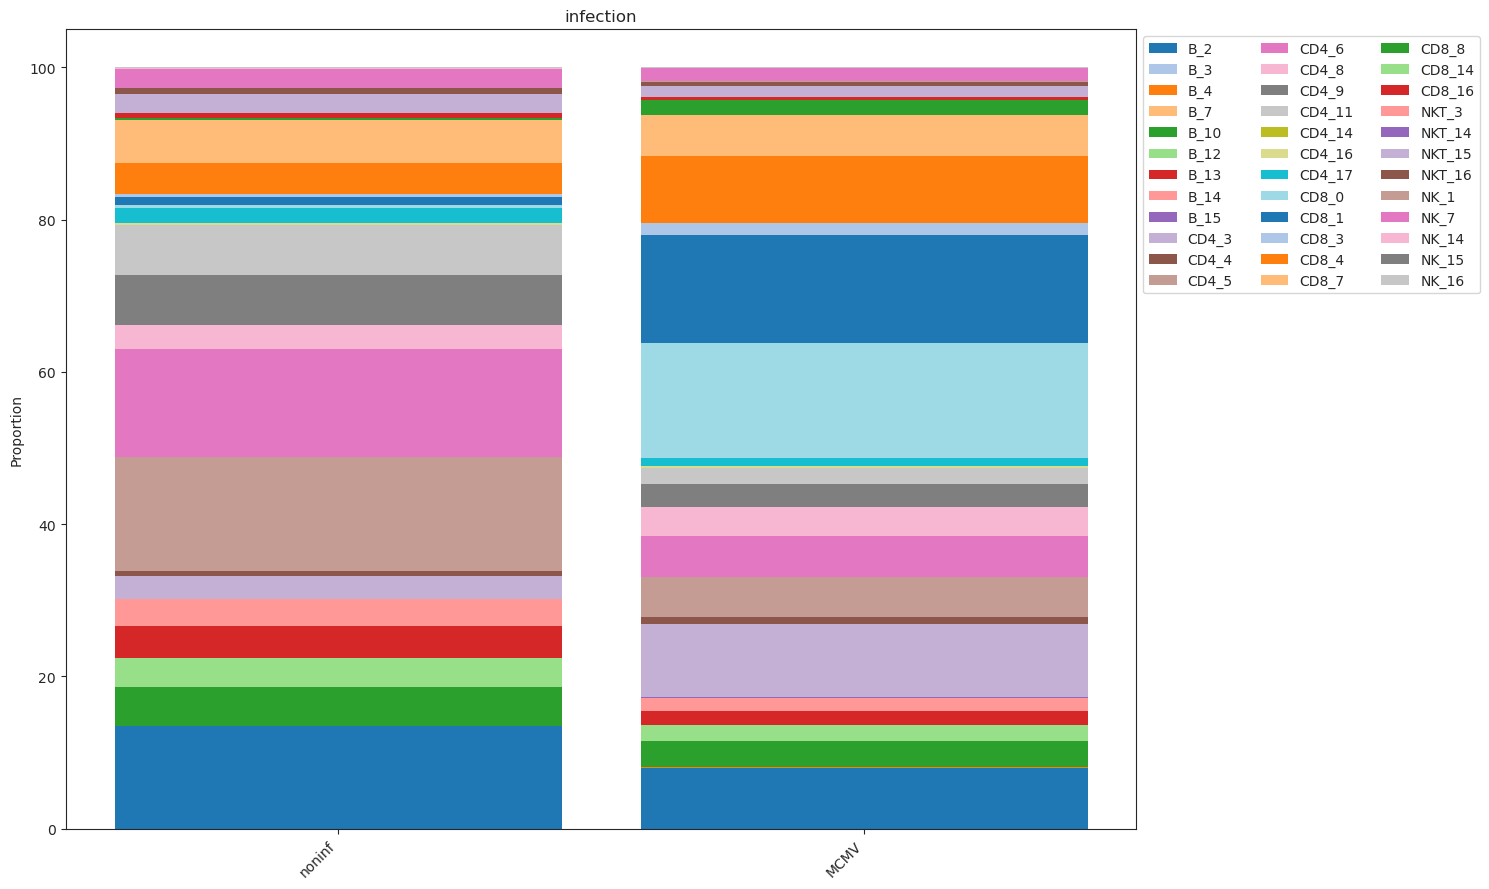

In [12]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="infection", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [13]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infection",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to NK_7

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [14]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


sample: 100%|██████████| 11000/11000 [08:26<00:00, 21.73it/s, 511 steps of size 9.94e-03. acc. prob=0.90] 


In [15]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 30 × 36
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_infection[T.MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [16]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 30 samples, 36 cell types                                    │
│ Reference cell type                        │ NK_7                                                               │
│ Formula                                    │ infection                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│            Final Parameter  Expected Sample                                                                     │
│ Cell Type                                                                                                       │
│ B_2             2.724           42.186                                                                          │
│ B_3            -0.551            1.595                                                                          │
│ B_4            -0.570            1.565                                                                          │
│ B_7            -0.573            1.561                                                                          │
│ B_10            1.566           13.251                                                                          │
│ B_12            1.450           11.800                                                                          │
│ B_13            1.626           14.071                                                                          │
│ B_14            1.316           10.320                                                                          │
│ B_15           -0.576            1.556                                                                          │
│ CD4_3           1.255            9.709                                                                          │
│ CD4_4           0.269            3.622                                                                          │
│ CD4_5           2.871           48.866                                                                          │
│ CD4_6           2.787           44.929                                                                          │
│ CD4_8           1.320           10.361                                                                          │
│ CD4_9           2.026           20.991                                                                          │
│ CD4_11          2.062           21.760                                                                          │
│ CD4_14         -0.562            1.578                                                                          │
│ CD4_16         -0.309            2.032                                                                          │
│ CD4_17          0.642            5.260                                                                          │
│ CD8_0           0.052            2.916                                                                          │
│ CD8_1           0.506            4.591                                                                          │
│ CD8_3          -0.049            2.636                                                                          │
│ CD8_4           1.595           13.641                                                                          │
│ CD8_7           1.949           19.435                                                                          │
│ CD8_8          -0.125            2.443                                                                          │
│ CD8_14         -0.537            1.618                                                                          │
│ CD8_16         -0.022            2.708                                                                          │
│ NKT_3          -0.516            1.652                                                                          │
│ NKT_14         -0.569            1.567                                                                          │
│ NKT_15          0.822            6.297                

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                            Final Parameter  Expected Sample  log2-fold change                                   │
│ Covariate       Cell Type                                                                                       │
│ infectionT.MCMV B_2            -0.534           23.429            -0.848                                        │
│                 B_3             0.000            1.511            -0.078                                        │
│                 B_4             0.000            1.483            -0.078                                        │
│                 B_7             0.000            1.479            -0.078                                        │
│                 B_10            0.000           12.554            -0.078                                        │
│                 B_12            0.000           11.179            -0.078                                        │
│                 B_13           -0.783            6.091            -1.208                                        │
│                 B_14           -0.570            5.531            -0.900                                        │
│                 B_15            0.000            1.474            -0.078                                        │
│                 CD4_3           1.221           31.181             1.683                                        │
│                 CD4_4           0.000            3.432            -0.078                                        │
│                 CD4_5          -0.979           17.392            -1.490                                        │
│                 CD4_6          -0.853           18.141            -1.308                                        │
│                 CD4_8           0.000            9.816            -0.078                                        │
│                 CD4_9          -0.732            9.568            -1.133                                        │
│                 CD4_11         -1.021            7.424            -1.552                                        │
│                 CD4_14          0.000            1.495            -0.078                                        │
│                 CD4_16          0.000            1.925            -0.078                                        │
│                 CD4_17          0.000            4.983            -0.078                                        │
│                 CD8_0           2.734           42.529             3.867                                        │
│                 CD8_1           2.291           42.996             3.227                                        │
│                 CD8_3           0.813            5.630             1.095                                        │
│                 CD8_4           0.771           27.951             1.035                                        │
│                 CD8_7           0.000           18.413            -0.078                                        │
│                 CD8_8           1.063            6.698             1.455                                        │
│                 CD8_14          0.000            1.533            -0.078                                        │
│                 CD8_16          0.000            2.565            -0.078                                        │
│                 NKT_3           0.000            1.565            -0.078                                        │
│                 NKT_14          0.000            1.484            -0.078                                        │
│                 NKT_15          0.000            5.966

### Filter out credible effects

In [17]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate          Cell Type
infection[T.MCMV]  B_2           True
                   B_3          False
                   B_4          False
                   B_7          False
                   B_10         False
                   B_12         False
                   B_13          True
                   B_14          True
                   B_15         False
                   CD4_3         True
                   CD4_4        False
                   CD4_5         True
                   CD4_6         True
                   CD4_8        False
                   CD4_9         True
                   CD4_11        True
                   CD4_14       False
                   CD4_16       False
                   CD4_17       False
                   CD8_0         True
                   CD8_1         True
                   CD8_3         True
                   CD8_4         True
                   CD8_7        False
                   CD8_8         True
                   CD

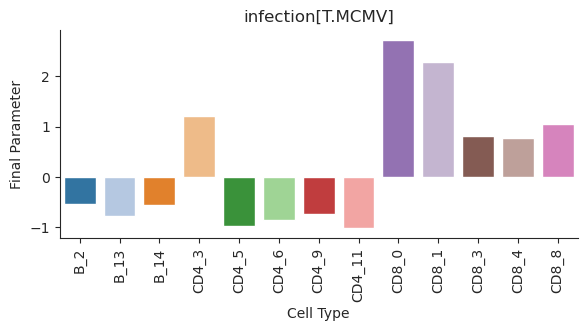

In [18]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

##### Adjust the "false discovery rate"

In [19]:
sccoda_data

MuData object with n_obs × n_vars = 10134 × 29414
  2 modalities
    rna:	10104 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'n_genes', 'sample', 'seed_labels', 'condition', 'genotype', 'infection', 'library', 'model', 'doublet_scores', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'C_scANVI', 'leiden', 'classification'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts-A1', 'mean_counts-A1', 'pct_dropout_by_counts-A1', 'total_counts-A1', 'n_cells_by_counts-A2', 'mean_counts-A2', 'pct_dropout_by_counts-A2', 'total_counts-A2', 'n_cells_by_counts-A3', 'mean_counts-A3', 'pct_dropout_by_counts-A3', 'total_counts-A3', 'n_cells_by_counts-A4', 'mean_counts-A4', 'pct_dropout_by_counts-A4', 'total_counts-A4', 'n_cells_by_counts-B1', 'mean_counts-B1', 'pct_dropout_by_counts-B1', 'total_counts-B1', 'n_cells_by_counts-B2', 'mean_counts-B2', 'pct_dropout_by_counts-B2', 'total_counts-B2'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    coda:	30 x 36
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_infection[T.MCMV]'

In [20]:
sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B_2,-0.534056,-0.874,-0.159,0.205,0.9508,23.429150,-0.848450
B_3,0.000000,-0.924,0.467,0.251,0.3771,1.511401,-0.077970
B_4,0.000000,-0.945,0.458,0.240,0.3547,1.482955,-0.077970
B_7,0.000000,-0.857,0.506,0.231,0.3609,1.478513,-0.077970
B_10,0.000000,-0.838,0.024,0.268,0.5695,12.553968,-0.077970
B_12,0.000000,-0.883,0.010,0.300,0.6796,11.178998,-0.077970
B_13,-0.783267,-1.282,-0.301,0.278,0.9766,6.090742,-1.207985
B_14,-0.569739,-1.005,0.002,0.340,0.7738,5.530608,-0.899930
B_15,0.000000,-0.841,0.531,0.225,0.3484,1.474084,-0.077970


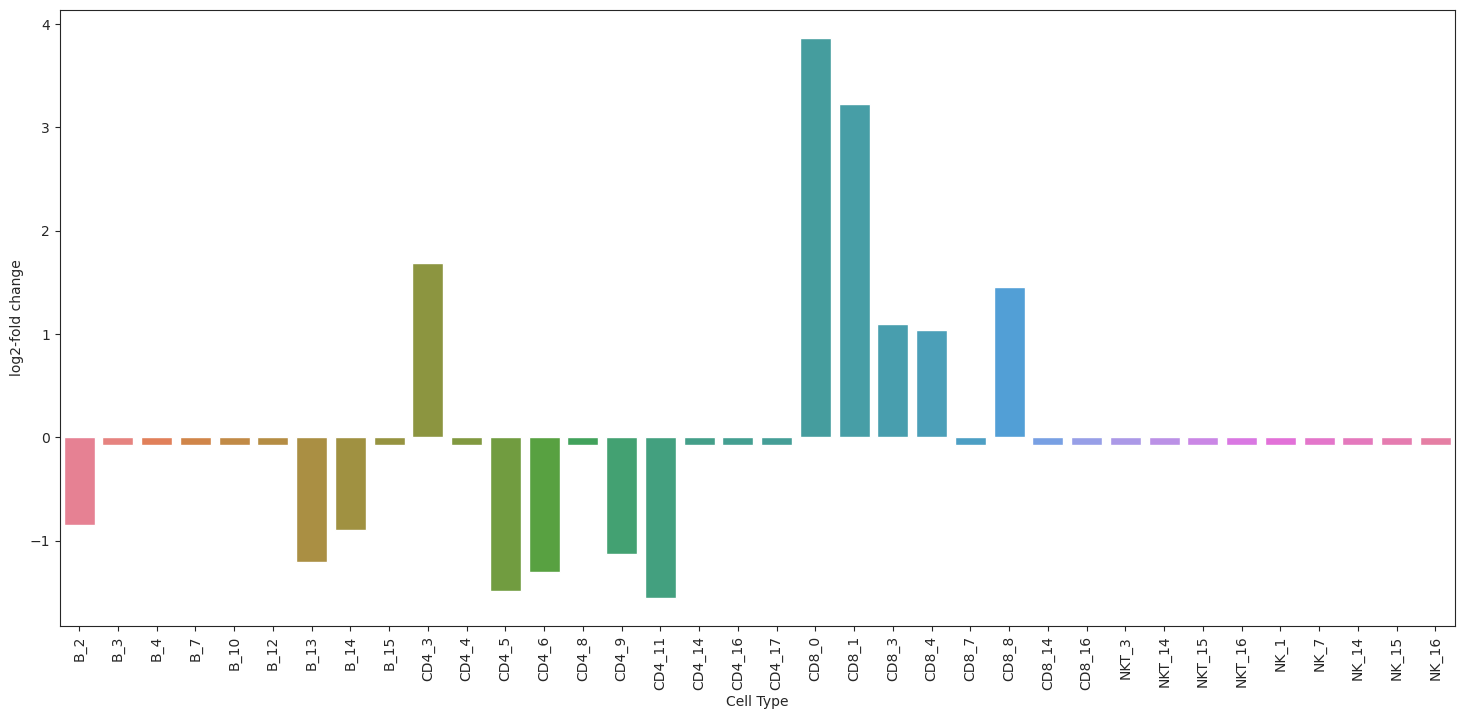

In [21]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.show()

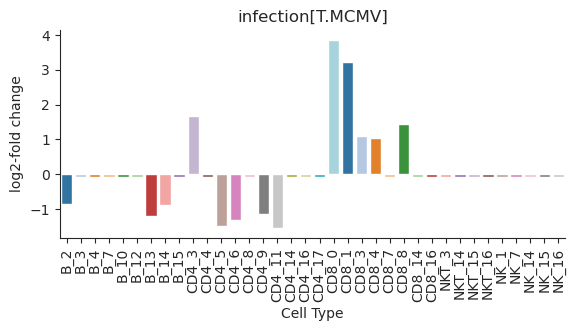

In [22]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "infection")
plt.show()